# This Notebook reads the Trigger Data JSON

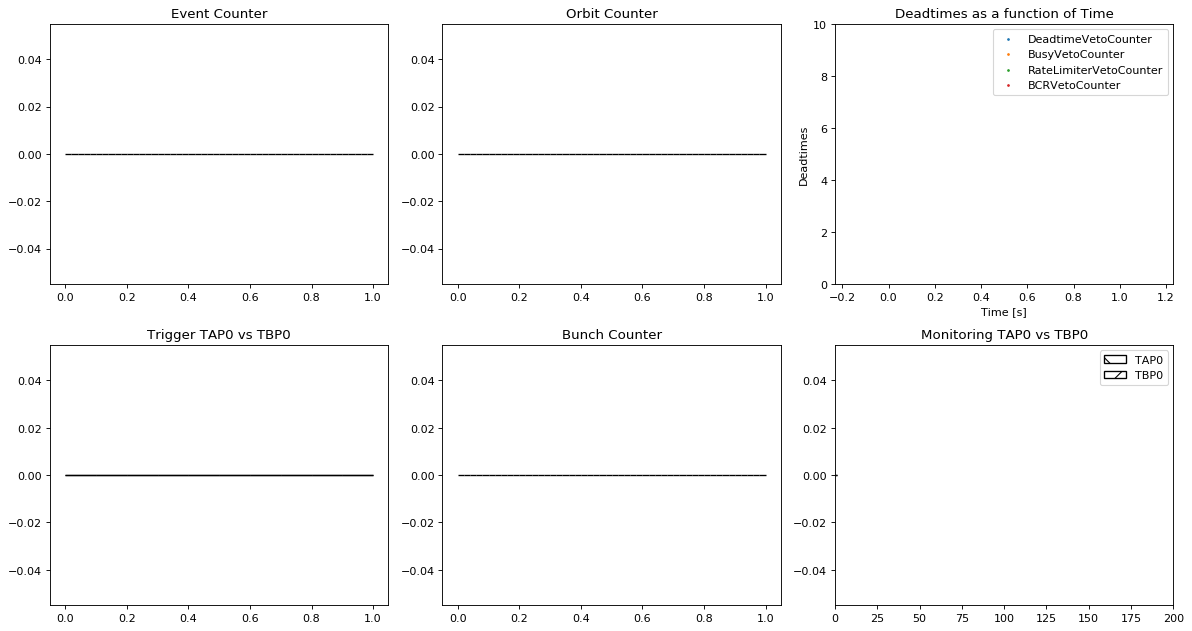

In [1]:
%matplotlib agg
%matplotlib agg
from IPython.display import display
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

for i in "a":
    Tdata=[]
    Tlines=[]
    with open('../../../build/TLBAccess/src/app/TriggerData.JSON') as TriggerFile:
        for line in TriggerFile:
            Tlines.append(line)
            
        for x in range(0,len(Tlines)-1):
            Tdata.append(json.loads(Tlines[x]))
    EventCounter = [None]*len(Tdata)
    OrbitCounter = [None]*len(Tdata)
    BunchCounter = [None]*len(Tdata)
    Trigger_TAP0 = [None]*len(Tdata)
    Trigger_TBP0 = [None]*len(Tdata)
    
    for i in range (0,len(Tdata)):
        EventCounter[i]=(Tdata[i]["EventCounter"])
        OrbitCounter[i]=(Tdata[i]["OrbitCounter"])
        BunchCounter[i]=(Tdata[i]["BunchCounter"])
        Trigger_TAP0[i]=(Tdata[i]["TAP0"])
        Trigger_TBP0[i]=(Tdata[i]["TBP0"])

    Mdata=[]
    Mlines=[]
    with open('../../../build/TLBAccess/src/app/MonitoringData.JSON') as MonitoringFile:
        for line in MonitoringFile:
            Mlines.append(line)
            
        for x in range(0,len(Mlines)-1):
            Mdata.append(json.loads(Mlines[x]))
            
    MBunchCounter = [None]*len(Mdata)
    MOrbitCounter = [None]*len(Mdata)
    DeadtimeVetoCounter = [None]*len(Mdata)
    BusyVetoCounter = [None]*len(Mdata)
    RateLimiterVetoCounter = [None]*len(Mdata)
    BCRVetoCounter = [None]*len(Mdata)
    TBP0 = [None]*len(Mdata)
    TAP0 = [None]*len(Mdata)
    Time = [None]*len(Mdata)

    
    for i in range (0,len(Mdata)):
        MBunchCounter[i]=(Mdata[i]["BunchCounter"])
        MOrbitCounter[i]=(Mdata[i]["OrbitCounter"])
        DeadtimeVetoCounter[i]=(Mdata[i]["DeadtimeVetoCounter"])
        BusyVetoCounter[i]=(Mdata[i]["BusyVetoCounter"])
        RateLimiterVetoCounter[i]=(Mdata[i]["RateLimiterVetoCounter"])
        BCRVetoCounter[i]=(Mdata[i]["BCRVetoCounter"])
        TBP0[i]=(Mdata[i]["TBP0"])
        TAP0[i]=(Mdata[i]["TAP0"])
        Time[i]=MOrbitCounter[i]*(1/11245)
       
        
        
    fig, axs = plt.subplots(2,3,figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
    
    axs[0,0].hist(EventCounter, bins=50, color="darkblue", fill=True, edgecolor="black", linewidth=1.2, label="BunchCounter")
    axs[0,0].set_title("Event Counter")

    axs[0,1].hist(OrbitCounter, bins=50, color="darkblue", fill="/", edgecolor="black", linewidth=1.2, label="BunchCounter")
    axs[0,1].set_title("Orbit Counter")

    axs[1,0].hist(Trigger_TAP0, bins=10, color="darkblue", fill=False,hatch='\\', edgecolor="black", linewidth=1.2, label="BunchCounter")
    axs[1,0].hist(Trigger_TBP0, bins=10, color="darkred", fill=False,hatch='/', edgecolor="black", linewidth=1.2, label="BunchCounter")
    axs[1,0].set_title("Trigger TAP0 vs TBP0")
    
    axs[1,1].hist(BunchCounter, bins=50, color="darkblue", fill=True, edgecolor="black", linewidth=1.2, label="BunchCounter")
    axs[1,1].set_title("Bunch Counter")
    
    axs[0,2].scatter(Time,DeadtimeVetoCounter, s=2, label="DeadtimeVetoCounter")
    axs[0,2].scatter(Time,BusyVetoCounter, s=2, label="BusyVetoCounter")
    axs[0,2].scatter(Time,RateLimiterVetoCounter, s=2, label="RateLimiterVetoCounter")
    axs[0,2].scatter(Time,BCRVetoCounter, s=2, label="BCRVetoCounter")
    axs[0,2].set_title("Deadtimes as a function of Time")
    axs[0,2].set_ylim(0, 10)
    axs[0,2].set(ylabel='Deadtimes', xlabel='Time [s]')
    axs[0,2].legend()
    
    axs[1,2].hist(TAP0, bins=10, color="darkblue", fill=False,hatch='\\', edgecolor="black", linewidth=1.2, label="TAP0")
    axs[1,2].hist(TBP0, bins=10, color="darkred", fill=False,hatch='/', edgecolor="black", linewidth=1.2, label="TBP0")
    axs[1,2].set_title("Monitoring TAP0 vs TBP0")
    axs[1,2].set_xlim(0,200)
    axs[1,2].legend()
    
    plt.tight_layout()
    display(fig)
    clear_output(wait=True)
    plt.savefig("LiveUpdate.png")

#clear_output()